# Loan Prediction Problem Dataset

The task is to predict a laon will be approve or not

### Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv("loan_train.csv")
test_df=pd.read_csv("loan_test.csv")



In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Getting data info

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


**Some of the coloumns having missing value like Gender,Married,Dependents ,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History**

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Test data is  also containing missing values like Gender,Dependents,Self_Employed,LoanAmount ,Loan_Amount_Term and Credit_History**

In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_df.shape

(614, 13)

# Cleaning data

## train_df data

In [9]:
# Removing Null values
# Gender contains categorical variable so we can only drop it
train_df=train_df.dropna(subset=['Gender'])
# Married contains categorical variable so we can only drop it
train_df=train_df.dropna(subset=['Married'])
# Dependents contains Null variable so we need to drop it
train_df=train_df.dropna(subset=['Dependents'])
# Self_Employed contains Null variable so we need to drop it
train_df=train_df.dropna(subset=['Self_Employed'])
# LoanAmount contains Null variable so we will replace it with average value 
train_df['LoanAmount']=train_df['LoanAmount'].replace(np.NaN,train_df['LoanAmount'].mean())
# Loan_Amount_Term contains Null variable so we will replace it with average value
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].replace(np.NaN,train_df['Loan_Amount_Term'].mean())
# Credit_History contains Null variable it contains only 0 and 1 so we will drop it

train_df=train_df.dropna(subset=['Credit_History'])



In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              511 non-null object
Gender               511 non-null object
Married              511 non-null object
Dependents           511 non-null object
Education            511 non-null object
Self_Employed        511 non-null object
ApplicantIncome      511 non-null int64
CoapplicantIncome    511 non-null float64
LoanAmount           511 non-null float64
Loan_Amount_Term     511 non-null float64
Credit_History       511 non-null float64
Property_Area        511 non-null object
Loan_Status          511 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 55.9+ KB


## test_df data

In [11]:
# Removing Null values
# Gender contains categorical variable so we can only drop it
test_df=test_df.dropna(subset=['Gender'])

# Dependents contains Null variable so we need to drop it
test_df=test_df.dropna(subset=['Dependents'])
# Self_Employed contains Null variable so we need to drop it
test_df=test_df.dropna(subset=['Self_Employed'])
# LoanAmount contains Null variable so we will replace it with average value 
test_df['LoanAmount']=test_df['LoanAmount'].replace(np.NaN,test_df['LoanAmount'].mean())
# Loan_Amount_Term contains Null variable so we will replace it with average value
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].replace(np.NaN,test_df['Loan_Amount_Term'].mean())
# Credit_History contains Null variable it contains only 0 and 1 so we will drop it

test_df=test_df.dropna(subset=['Credit_History'])



In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              298 non-null object
Gender               298 non-null object
Married              298 non-null object
Dependents           298 non-null object
Education            298 non-null object
Self_Employed        298 non-null object
ApplicantIncome      298 non-null int64
CoapplicantIncome    298 non-null int64
LoanAmount           298 non-null float64
Loan_Amount_Term     298 non-null float64
Credit_History       298 non-null float64
Property_Area        298 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 30.3+ KB


In [13]:
train_df['Dependents']=train_df['Dependents'].replace("3+","3")

In [14]:
test_df['Dependents']=test_df['Dependents'].replace("3+","3")

**Now my data is completly cleaned**

# Exploring Data

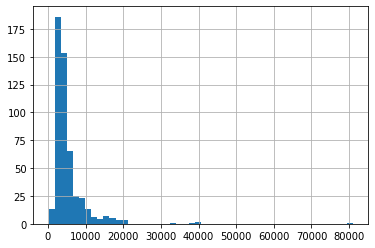

In [15]:
train_df["ApplicantIncome"].hist(bins=50)

In [16]:
train_df['Property_Area'].value_counts()

Semiurban    197
Urban        165
Rural        149
Name: Property_Area, dtype: int64

In [17]:
train_df['Gender'].value_counts()

Male      420
Female     91
Name: Gender, dtype: int64

In [18]:
train_df['Education'].value_counts()

Graduate        401
Not Graduate    110
Name: Education, dtype: int64

In [19]:
train_df.groupby('Education')['Credit_History'].value_counts(normalize=True)

Education     Credit_History
Graduate      1.0               0.857855
              0.0               0.142145
Not Graduate  1.0               0.790909
              0.0               0.209091
Name: Credit_History, dtype: float64

In [20]:
credit_hist=train_df.pivot_table(index='Education',values='Credit_History')
credit_hist

,Credit_History
Education,
Graduate,0.857855
Not Graduate,0.790909


Text(0.5, 1.0, 'credit_history of graduates and non graduates')

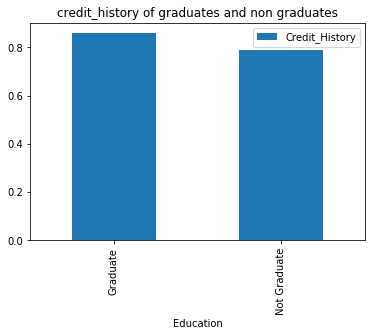

In [21]:
credit_hist.plot(kind="bar")
plt.title("credit_history of graduates and non graduates")

**Graduate has the good credit history than non graduates**

In [22]:
credit_hist_gender=train_df.pivot_table(index='Gender',values='Credit_History')
credit_hist_gender

,Credit_History
Gender,
Female,0.824176
Male,0.847619


Text(0.5, 1.0, 'credit history of male and female')

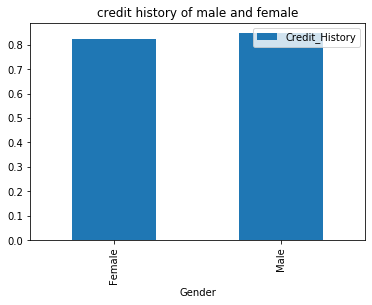

In [23]:
credit_hist_gender.plot(kind="bar")
plt.title("credit history of male and female")

**MAle has good credit score than tha female**

In [24]:
credit_hist_property_area=train_df.pivot_table(index='Property_Area',values='Credit_History')
credit_hist_property_area

,Credit_History
Property_Area,
Rural,0.825503
Semiurban,0.873096
Urban,0.824242


Text(0.5, 1.0, 'ctedit history of each property area')

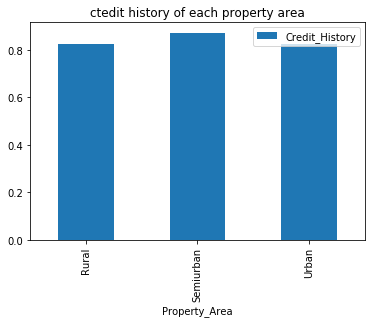

In [25]:
credit_hist_property_area.plot(kind="bar")
plt.title("ctedit history of each property area")

**people belongs to semi urban has good credit scores than others**

In [26]:
credit_hist_self=train_df.pivot_table(index='Self_Employed',values='Credit_History')
credit_hist_self

,Credit_History
Self_Employed,
No,0.845805
Yes,0.828571


Text(0.5, 1.0, 'Credit score based on types of employment')

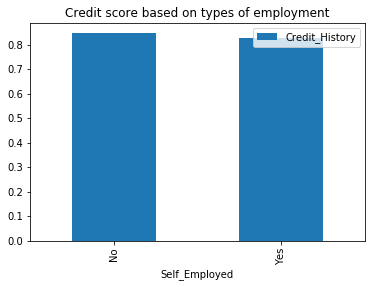

In [27]:
credit_hist_self.plot(kind="bar")
plt.title("Credit score based on types of employment")

**people who are not self employed has a good credit score**

# converting categorical data into numerical data for fitting the model and choosing features which are important

In [31]:
train=train_df.copy()
test=test_df.copy()
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.917757,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
categ=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in categ:
    train[i]=lb.fit_transform(train[i])
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,144.917757,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [39]:
categ=['Gender','Married','Education','Self_Employed','Property_Area']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in categ:
    test[i]=lb.fit_transform(test[i])
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [41]:
features=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History','Property_Area']
target='Loan_Status'

In [44]:
train[features].head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849,144.917757,1.0,2
1,1,1,1,0,0,4583,128.000000,1.0,0
2,1,1,0,0,1,3000,66.000000,1.0,2
3,1,1,0,1,0,2583,120.000000,1.0,2
4,1,0,0,0,0,6000,141.000000,1.0,2


In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(train[features])
sc.fit_transform(test[features])



array([[ 0.50209645,  0.72677722, -0.75833285, ..., -0.44958841,
         0.43817805,  1.10570198],
       [ 0.50209645,  0.72677722,  0.18720351, ..., -0.17837835,
         0.43817805,  1.10570198],
       [ 0.50209645,  0.72677722,  1.13273986, ...,  1.2115732 ,
         0.43817805,  1.10570198],
       ...,
       [ 0.50209645,  0.72677722, -0.75833285, ..., -0.36483526,
         0.43817805,  1.10570198],
       [ 0.50209645,  0.72677722, -0.75833285, ...,  0.36404177,
         0.43817805, -1.29940159],
       [ 0.50209645, -1.37593746, -0.75833285, ..., -0.65299595,
         0.43817805, -1.29940159]])

# Fitting model
our data is ready

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(train[features],train[target])


DecisionTreeClassifier()

In [57]:
prediction=clf.predict(test[features])
prediction

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [55]:
result=pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_status':prediction})
result.head()

,Loan_ID,Loan_status
0,LP001015,1
1,LP001022,1
2,LP001031,1
4,LP001051,0
5,LP001054,1


In [68]:
result.to_csv("Loan_prediction.csv",index=False)

In [69]:
clf.score(train[features],train[target])

1.0